# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Nothing else, you are to use **Matplotlib** and **matplotlib** **only** !!
3. Make the best presentation possible.


Best of luck !!

![](https://media.tenor.com/LyLjvOKNGoEAAAAd/good-luck-friend.gif)

# Table of Contents

- ## [Data Preprocessing](#01)
    - [Importing data](#01a)
    - [Identifying NA values](#01b)
    - [Filling the NA values](#01c)
- ## [Exploratory Data Analysis](#01d)
    - [Pairplot to check the relationship among variables](#01e)
    - [Distribution of Loan Amount](#01f)
    - [Loan demanded segregated by Gender and Education Status](#01g)
    - [Loan Amount and Income of Applicants and CoApplicants](#01h)
    - [Gender Distribution](#01i)
    - [Dependents and Education Status](#01j)
    - [Loan tenure of different Property Areas classified by Employment Status](#01k)
    - [Gender Ratio and Marital Status](#01l)
    - [Income wise Loan Amount](#01m)
    - [Distribution of Applicant Income across Property Area and Credit History](#01n)
    - [Relationship between Loan Amount and tenure of the Loan](#01o)
    - [Credit History of the Applicants](#01p)
    - [Loan Status categorized by Employment Status](#01q)
    - [Correlation among the variables](#01r)
    - [3D Scatter Plot](#01s)
- ## [The end](#01t)

![](https://media1.tenor.com/images/7dcc0b5a2c64d741b6edd12a88738cf9/tenor.gif?itemid=4767352)

<h1><center>DATA PREPROCESSING</center><h1><a class="anchor" id="01"></a> 

# Importing data <a class="anchor" id="01a"></a>

In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Some styling
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

# Subplots
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("Loan Approval Data - loan_sanction_train.csv")

In [3]:
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Identifying NA values <a class="anchor" id="01b"></a>

In [5]:
#First we create a list of missing values by each feature
temp = list(df.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in df.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [6]:
fig = px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=500,width=900,color='Missing_Values',text='Missing_Values',title='Missing values in the dataset')
fig.update_traces(textposition='outside')
fig.show()

# Filling the NA values <a class="anchor" id="01c"></a>

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df['Credit_History'].fillna(df['Credit_History'].median(), inplace = True)
df['Self_Employed'].fillna("None", inplace = True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Dependents'].fillna("0", inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)
df['Gender'].fillna("Not Specified", inplace = True)
df['Married'].fillna("None", inplace = True)

In [10]:
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162             360.0   
1               4583             1508.0  128.000000             360.0   
2               3000                0.0   66.000000             360.0   
3               2583             2358.0  120.000000             360.0   
4               6000                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609             2900                0.0   71.000000             360.0   
610             4106                0.0   40.000000             180.0   
611             8072              240.0  253.000000             360.0   
612             7583                0.0  187.000000             360.0   
613             4583                0.0  133.000000             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [11]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<h1><center>EXPLORATORY DATA ANALYSIS</center><h1><a class="anchor" id="01d"></a>

## Pairplot to check the relationship among variables <a class="anchor" id="01e"></a>

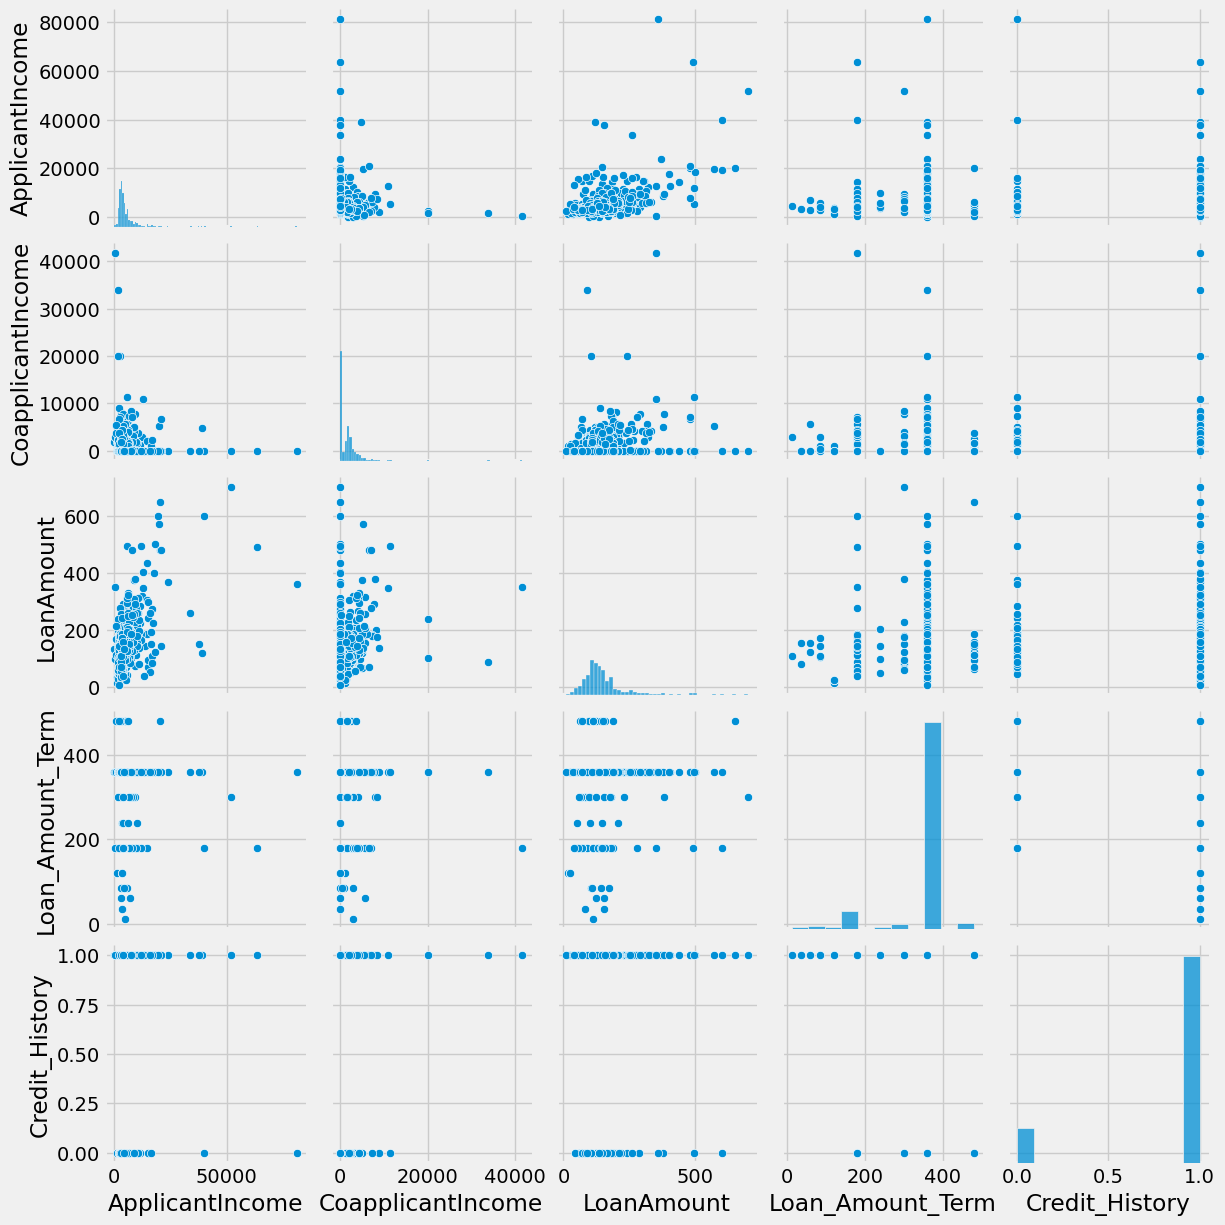

In [12]:
sns.pairplot(df)

In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Distribution of Loan Amount  <a class="anchor" id="01f"></a>

(array([ 72., 332., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

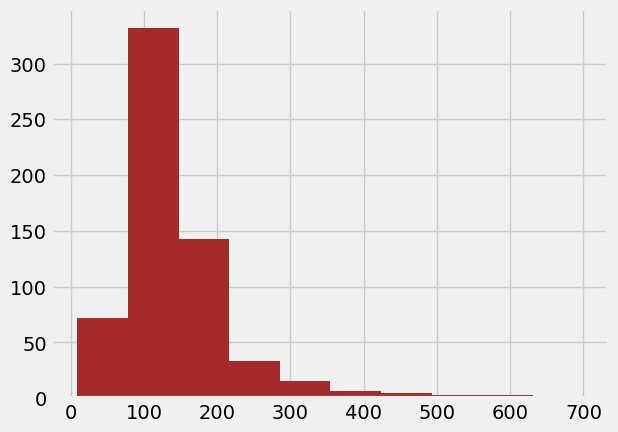

In [93]:
fig,ax = plt.subplots()
ax.hist(df['LoanAmount'], color=['brown'])

* We can see that the distribution of loan amount is right skewed. This means that most of the loan amount lies between 100-200.

## Loan demanded segregated by Gender and Education Status  <a class="anchor" id="01g"></a>

In [15]:
df_graduates=df[df['Education']=='Graduate']
df_nongraduates=df[df['Education']=='Not Graduate']

Text(0.5, 0.98, 'Loan demanded segregated by Gender and Education Status')

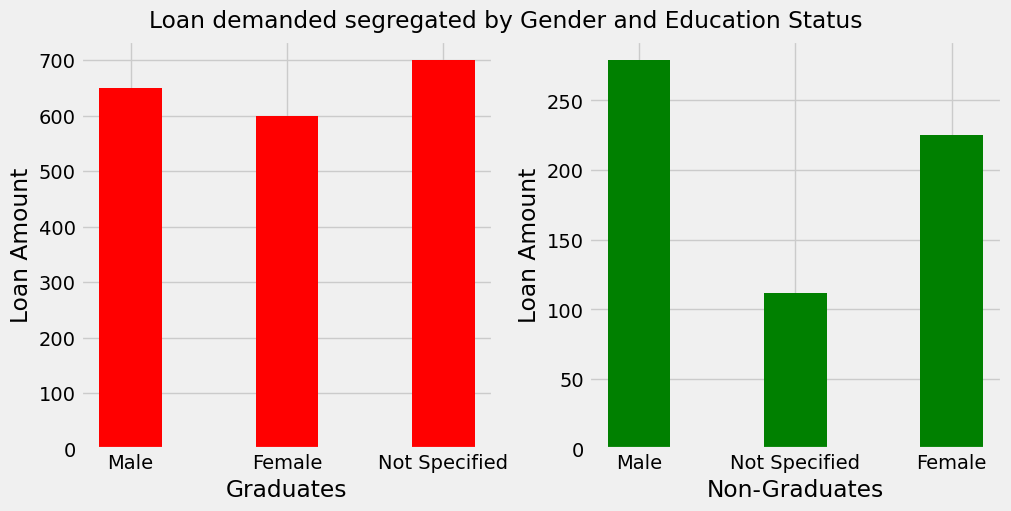

In [16]:
fig, axs = plt.subplots(1,2, figsize=(10, 5),layout='constrained')
axs[0].bar(df_graduates['Gender'],df_graduates['LoanAmount'],color='red',width=0.4)
axs[0].set_xlabel('Graduates')
axs[0].set_ylabel('Loan Amount')


axs[1].bar(df_nongraduates['Gender'],df_nongraduates['LoanAmount'],color='green',width=0.4)
axs[1].set_xlabel('Non-Graduates')
axs[1].set_ylabel('Loan Amount')

plt.suptitle('Loan demanded segregated by Gender and Education Status')

* We can see that people who are graduates have demanded more amount of loan as compared to non-graduates. The maximum loan amount of graduates is approximately 700 as compared to non-graduates with approximately 300.
* Also, we can say that male category has high demand for loan in comparison to the female category.

## Loan Amount and Income of Applicants and CoApplicants <a class="anchor" id="01h"></a>

Text(0.5, 0.98, 'Loan Amount and Income of Applicants and CoApplicants')

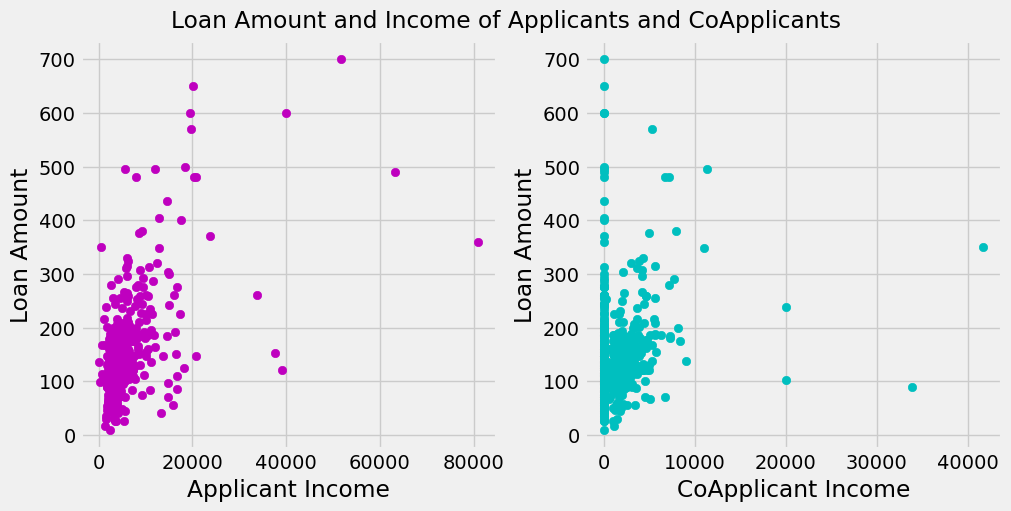

In [17]:
fig, axs = plt.subplots(1,2, figsize=(10, 5),layout='constrained')
axs[0].scatter(df['ApplicantIncome'], df['LoanAmount'], color = 'm')
axs[0].set_xlabel('Applicant Income')
axs[0].set_ylabel('Loan Amount')
axs[1].scatter(df['CoapplicantIncome'], df['LoanAmount'], color = 'c')
axs[1].set_xlabel('CoApplicant Income')
axs[1].set_ylabel('Loan Amount')
plt.suptitle('Loan Amount and Income of Applicants and CoApplicants')

* Most of the loan amounts lie between 0-300 with the applicant income between 0-20000 and coapplicant income between 0-10000. 
* There is a weak positive relationship between the applicant income and the loan amount because increase in loan amount is greater than increase in applicant income.
* On the other hand, we can see that there are some coapplicants with 0 income but still have demanded a very high loan amount.

## Gender Distribution <a class="anchor" id="01i"></a>

Text(3, 200, 'Majority')

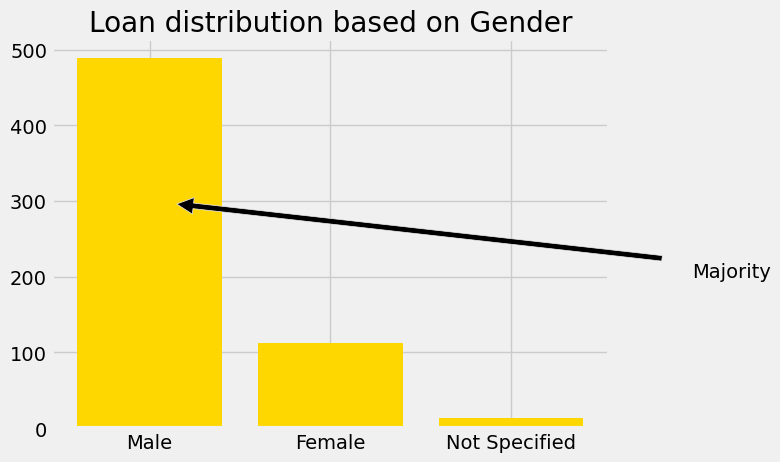

In [134]:
fig, ax = plt.subplots()
ax.bar(df['Gender'].value_counts().index,df['Gender'].value_counts().values, color ='gold')
ax.set_title('Loan distribution based on Gender')
ax.annotate('Majority', 
            xy=(0, 300), # The xy decides where the arrow will point to
            xytext=(3, 200),  # The xytext decides where the text will start from.
            arrowprops = {'facecolor': 'black', 'shrink': 0.05} # The arrowprops takes a dictionary as input. It wants the color of the arrow and the size of the arrow. 
           )

* Male category is taking more risk as compared to female category.
* Females either depend on males for making financial decisions or remain financially unsatisfied.

## Dependents and Education Status <a class="anchor" id="01j"></a>

Text(0.5, 1.0, 'Education')

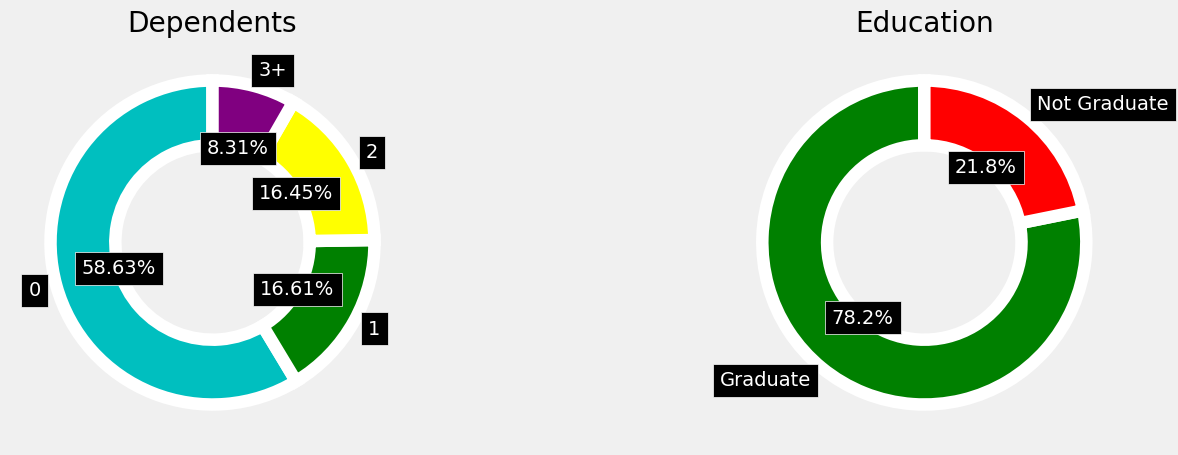

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
bt_colors = ['#4CAF50', '#FFC107', '#2196F3']
dept_colors = ['c', 'Green', 'Yellow', 'Purple']
wedgeprops = {'linewidth': 9, 'edgecolor': 'white', 'width': 0.4}
dp_counts = df['Dependents'].value_counts()
axs[0].pie(dp_counts, labels=dp_counts.index,wedgeprops=wedgeprops, autopct='%2.2f%%', startangle=90, textprops={'color':'w', 'fontsize': 14, 'bbox': {'facecolor': 'black', 'edgecolor': 'white', 'pad': 5}},colors=dept_colors)
axs[0].set_title('Dependents')

colors = ['green','r']
edu = df['Education'].value_counts()
axs[1].pie(edu, labels=edu.index,wedgeprops=wedgeprops, autopct='%0.1f%%', startangle=90, textprops={'color':'w', 'fontsize': 14, 'bbox': {'facecolor': 'black', 'edgecolor': 'white', 'pad': 5}},colors=colors)
axs[1].set_title('Education')

* The students who are graduates are becoming independent and thus, applying for loan.
* Financial situations of joint families are more stable than that of nuclear families and individuals because people who have 3+ dependents are least populated.


## Loan tenure of different Property Areas classified by Employment Status <a class="anchor" id="01k"></a>

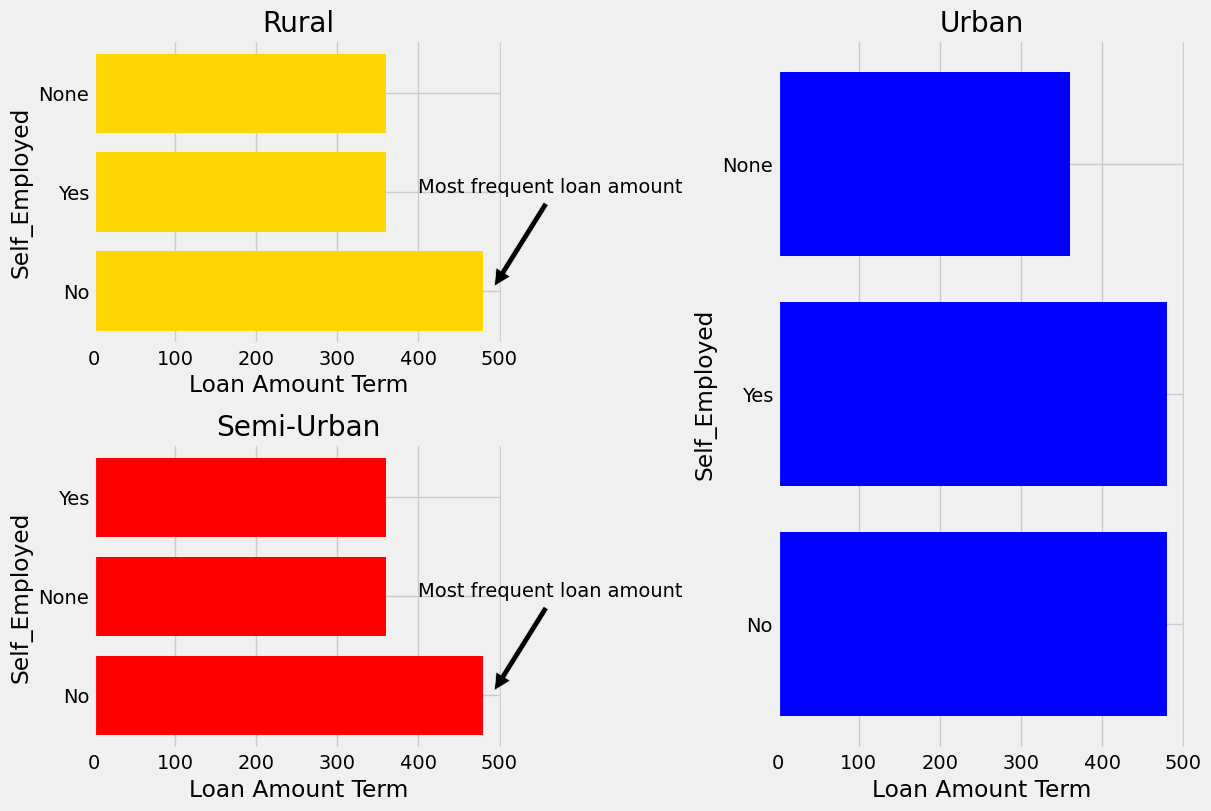

In [97]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['downleft', 'right']], layout='constrained',figsize=(12, 8))

axd['upleft'].set_title('Rural')
axd['downleft'].set_title('Semi-Urban')
axd['right'].set_title('Urban')

df_rural=df[df['Property_Area']=='Rural']
df_urban=df[df['Property_Area']=='Urban']
df_semiurban=df[df['Property_Area']=='Semiurban']

loan_term_rural = df_rural['Loan_Amount_Term']
loan_term_urban = df_urban['Loan_Amount_Term']
loan_term_surban = df_semiurban['Loan_Amount_Term']

axd['upleft'].barh(df_rural['Self_Employed'],loan_term_rural,color='gold')
axd['upleft'].set_xlabel('Loan Amount Term')
axd['upleft'].set_ylabel('Self_Employed')
axd['upleft'].annotate('Most frequent loan amount', 
            xy=(490, 0), # The xy decides where the arrow will point to
            xytext=(400, 1),  # The xytext decides where the text will start from.
            arrowprops = {'facecolor': 'black', 'shrink': 0.05} # The arrowprops takes a dictionary as input. It wants the color of the arrow and the size of the arrow. 
           )

axd['downleft'].barh(df_semiurban['Self_Employed'],loan_term_surban,color='red')
axd['downleft'].set_xlabel('Loan Amount Term')
axd['downleft'].set_ylabel('Self_Employed')
axd['downleft'].annotate('Most frequent loan amount', 
            xy=(490, 0), # The xy decides where the arrow will point to
            xytext=(400, 1),  # The xytext decides where the text will start from.
            arrowprops = {'facecolor': 'black', 'shrink': 0.05} # The arrowprops takes a dictionary as input. It wants the color of the arrow and the size of the arrow. 
           )


axd['right'].barh(df_urban['Self_Employed'],loan_term_urban,color='b')
axd['right'].set_xlabel('Loan Amount Term')
axd['right'].set_ylabel('Self_Employed')

plt.show()

* Most of the people applying for loan are not self employed.
* There are less opportunities in rural and semi-urban areas as compared to urban areas because of more number of self employed people in urban areas.

## Gender Ratio and Marital Status <a class="anchor" id="01l"></a>

Text(0.5, 1.0, 'Marital Status')

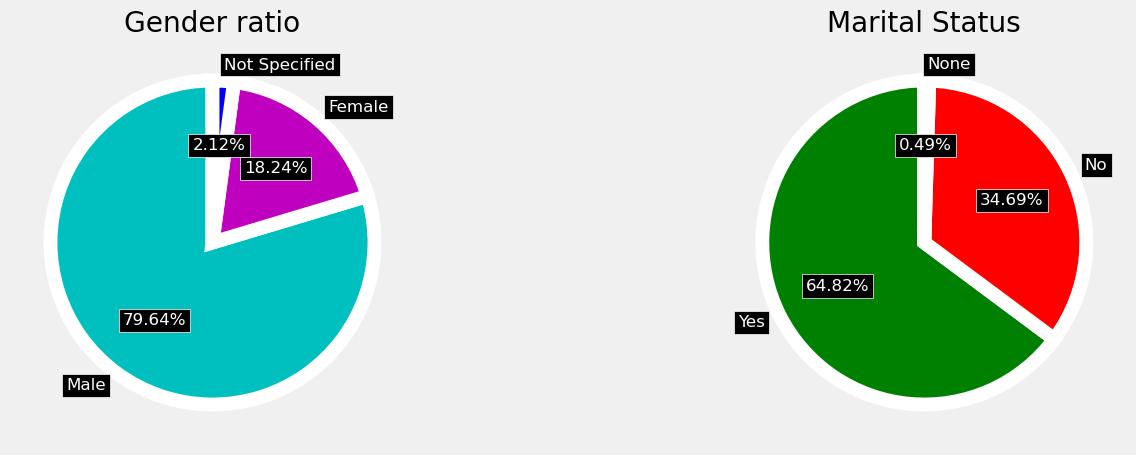

In [86]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
wedgeprops = {'linewidth': 10, 'edgecolor': 'white'}
m_counts = df['Married'].value_counts()
colors2 = ['g', 'r', 'gold']
colors = ['c', 'm','blue']

gender_count = df['Gender'].value_counts()
axs[0].pie(gender_count, labels=gender_count.index,wedgeprops=wedgeprops, autopct='%1.2f%%', startangle=90, textprops={'color':'white', 'fontsize': 12, 'bbox': {'facecolor': 'black', 'edgecolor': 'white', 'pad': 3}},colors=colors)
axs[0].set_title('Gender ratio')

axs[1].pie(m_counts, labels=m_counts.index,wedgeprops=wedgeprops, autopct='%1.2f%%', startangle=90, textprops={'color':'white', 'fontsize': 12, 'bbox': {'facecolor': 'black', 'edgecolor': 'white', 'pad': 3}},colors=colors2)
axs[1].set_title('Marital Status')

* People feel more inconvenient to reveal their gender as compared to their marital status.
* Families require more funds as compared to singles.
* Gender is playing a major role in the application of loan. Male category is dominant while applying for the loan.

## Income wise Loan Amount <a class="anchor" id="01m"></a>

Text(0.5, 1.0, 'Income wise Loan Amount')

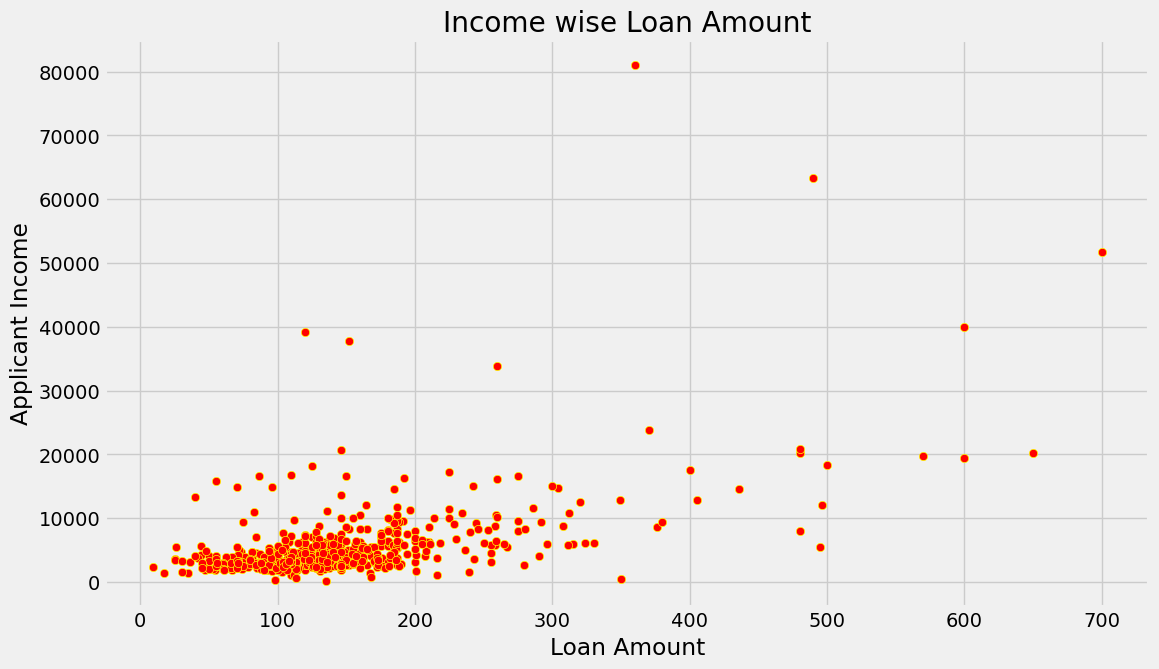

In [83]:
fig, ax = plt.subplots(figsize=(12, 7))  
ax.scatter(df['LoanAmount'], df['ApplicantIncome'],facecolor='red',edgecolor='yellow') 
plt.xlabel("Loan Amount")
plt.ylabel("Applicant Income")
ax.set_title('Income wise Loan Amount')

* People with lower incomes have demanded lower amount of loan.
* Most of the people have demanded loan between 0-200.
* Most of the applicant income range from 0-10000 only.

## Distribution of Applicant Income across Property Area and Credit History <a class="anchor" id="01n"></a>

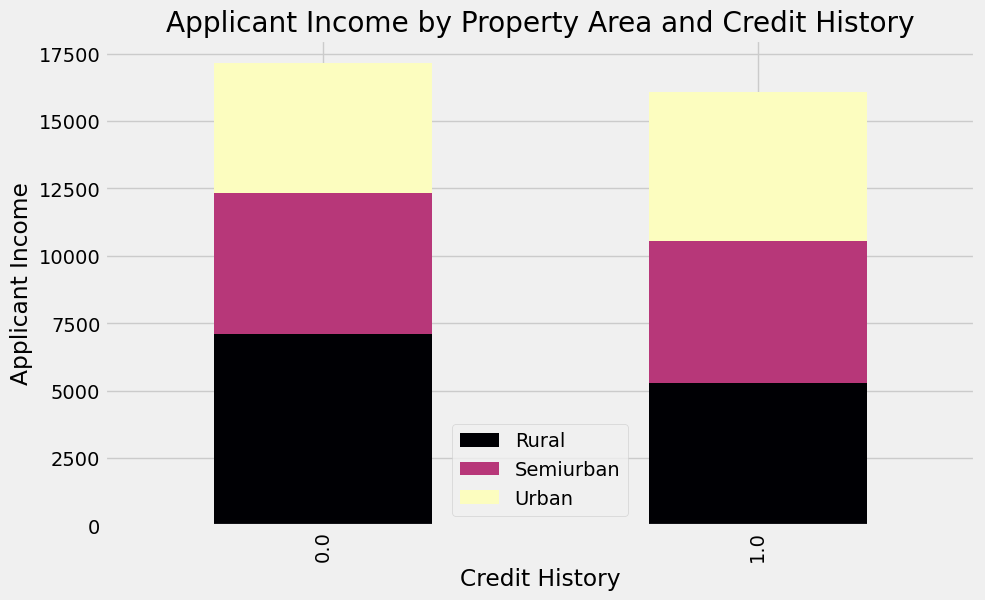

In [74]:
# Grouping the data
grouped_data = df.groupby(['Credit_History', 'Property_Area'])['ApplicantIncome'].mean().unstack()

# Creating the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax, cmap= 'magma')

# Adding labels and legend
ax.set_xlabel('Credit History')
ax.set_ylabel('Applicant Income')
ax.set_title('Applicant Income by Property Area and Credit History')
ax.legend()
    
plt.show()

* Generally, applicant income does not define their asset liability management(credit repayment).
* There is a relative strong correlation between urban and semi urban areas on the basis of applicant income and credit history.

## Relationship between Loan Amount and tenure of the Loan <a class="anchor" id="01o"></a>

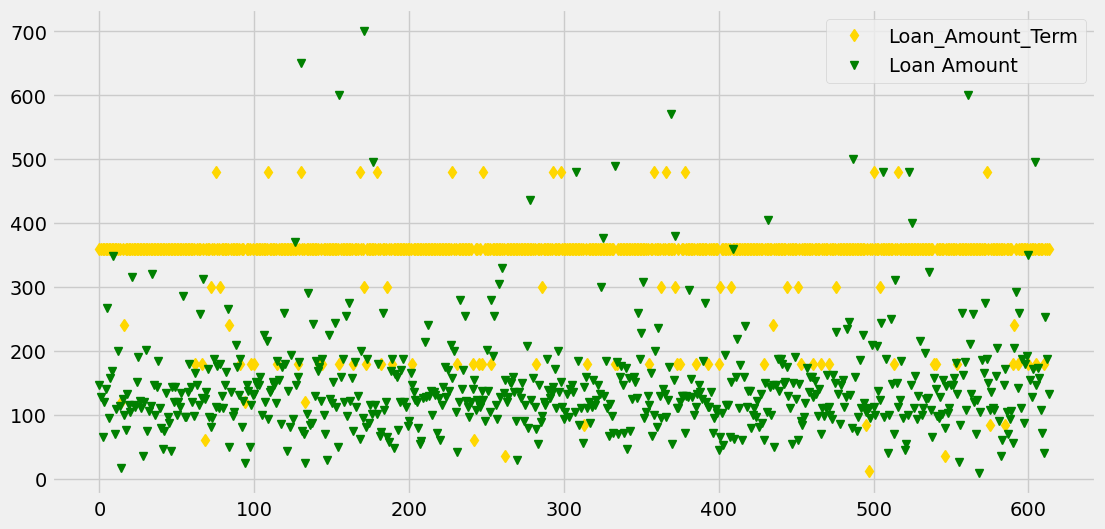

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Loan_Amount_Term'], 'd', color='Gold', label='Loan_Amount_Term')
ax.plot(df['LoanAmount'], 'v', color='Green', label='Loan Amount')
ax.legend()

* Most of the people are demanding loan for 360 months.
* The loan amount is rather cramped approximately between 0-200.

## Credit History of the Applicants <a class="anchor" id="01p"></a>

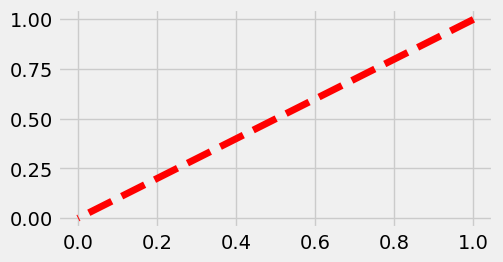

In [62]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(df['Credit_History'],df['Credit_History'], color='red', linewidth=5, linestyle='--')

* Majority of the applicants of loan have a good credit history of 1.0.

## Loan Status categorized by Employment Status <a class="anchor" id="01q"></a>

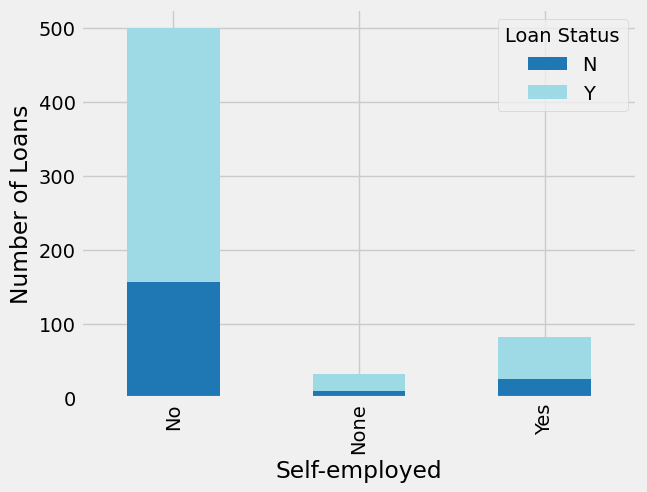

In [54]:
grouped_data = df.groupby(['Self_Employed', 'Loan_Status']).size().unstack()
colors = cm.tab20c.colors
# Create a bar chart to visualize the data
ax = grouped_data.plot(kind='bar', stacked=True, cmap = 'tab20')
ax.set_xlabel('Self-employed')
ax.set_ylabel('Number of Loans')
ax.legend(title='Loan Status')
plt.show()

* Majority of the loans approved belong to the people who are not self-employed.
* There are very less number of sel-employed people applying for loan, which indicates that the businesses in the country are doing well.

# Correlation among the variables <a class="anchor" id="01r"></a>

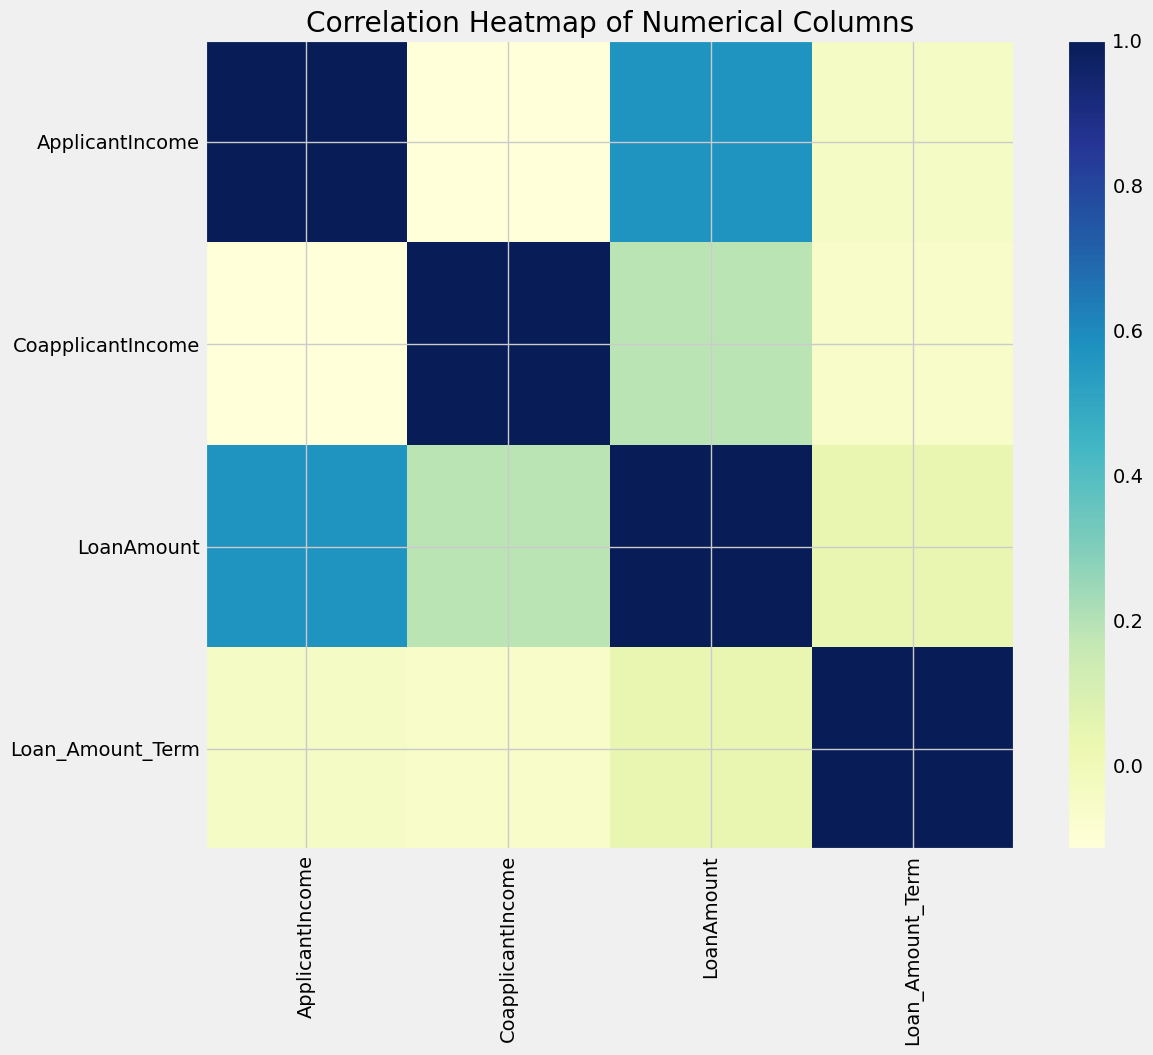

In [138]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df_numerical = df[numerical_cols]

# Create a heatmap using the correlation matrix
corr = df_numerical.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap="YlGnBu")
plt.colorbar()

# Set the tick labels
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=90)
plt.yticks(range(len(numerical_cols)), numerical_cols)

# Set the plot title
plt.title("Correlation Heatmap of Numerical Columns")

# Show the plot
plt.show()

* It seems that the correlationship between the variables is very weak.
* Only Applicant income and loan amount is somewhat correlated with a very weak correlation of around 0.4.

# 3D Scatter Plot <a class="anchor" id="01s"></a>

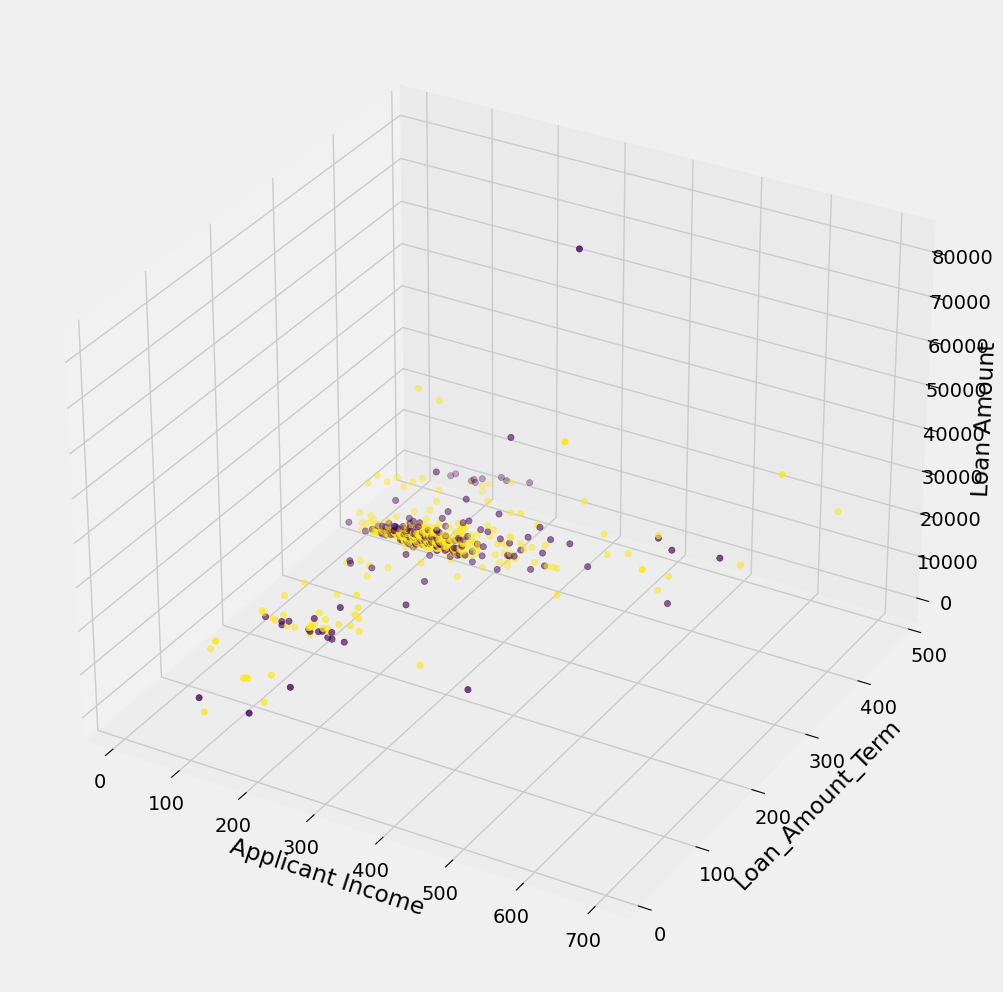

In [25]:
import random
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

x = le.fit_transform(df['Loan_Status'])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['LoanAmount'], df['Loan_Amount_Term'], df['ApplicantIncome'],c=x)
ax.set_xlabel('Applicant Income')
ax.set_ylabel('Loan_Amount_Term')
ax.set_zlabel('Loan Amount')


plt.show()

# ==========================THE END=========================== <a class="anchor" id="01t"></a>